### Basic understanding of Machine learning
#### By: George Musabandesu

The purpose of this project activity is to use some linear regression analysis and simple machine learning techniques to analyze a python dataset to gain some insights about the association of features and the target variable (disease progression)  
Machine learnng is the study of computational algorithms that often applies to unstractured big data like images and text, with a particular focus on prediction.  
A Statistical Modeld is a mathematical model (built up a set of statistical assumptions) and is mostly concerned about estimation and inference, e.g., hypothesis testing. It is mostly useful for small data and applies to scenarios that demands interpretability.  
Assumptions:  
$ Y = f(X)+\epsilon$ where f is a true model  
X and 𝜖 are independent   
$E(\epsilon) = 0$ and $Var(\epsilon) = \sigma^2$

We will use the diabetes dataset to compare the training dataset with the validation dataset. We will split the dataset into these two parts and then use machine learning to compare their MSEs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

The Sklearn Diabetes Dataset include following attributes:  

age: Age in years  
sex: Gender of the patient  
bmi: Body mass index  
bp: Average blood pressure  
s1: Total serum cholesterol (tc)  
s2: Low-density lipoproteins (ldl)  
s3: High-density lipoproteins (hdl)  
s4: Total cholesterol / HDL (tch)  
s5: Possibly log of serum triglycerides level (ltg)  
s6: Blood sugar level (glu)

In [2]:
# Loading the diabetes dataset within python
data1 = load_diabetes()

In [3]:
data1.target[:3] # Looking at the first 3 entries in the target variable (dependent variable)

array([151.,  75., 141.])

In [4]:
# Convert the dataset into a DataFrame
data_df = pd.DataFrame(data = data1.data, columns = data1.feature_names)

In [5]:
# add a target variable to the DataFrame
data_df['target'] = data1.target

In [6]:
# Looking at the first 5 entries of the dataset
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
# Getting additional information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
print(data1.DESCR)  # Displays dataset description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
# checking for missing values
data_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [10]:
# Set pandas to display numbers in float format without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Descriptive Statistics
data_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


#### Some useful Visualizations: BMI vs. Diabetes Progression

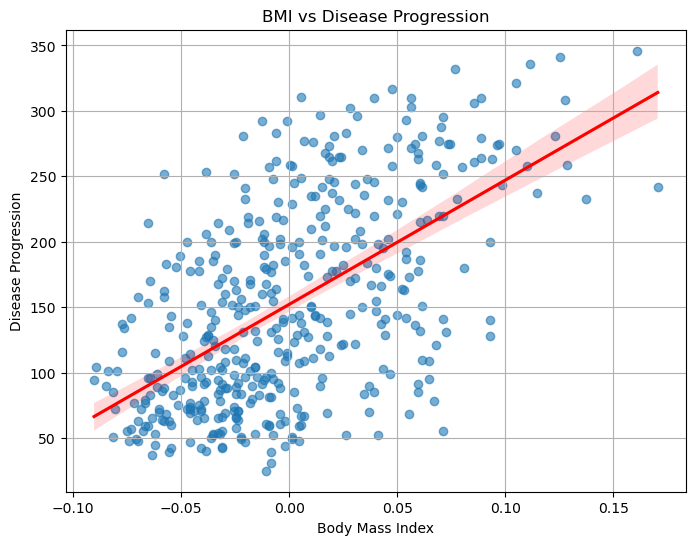

In [11]:
import seaborn as sns

# Plot
plt.figure(figsize=(8,6))
sns.regplot(x = 'bmi', y = 'target', data=data_df, scatter_kws={'alpha':0.6},
           line_kws={'color':'red'})
plt.title('BMI vs Disease Progression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')
plt.grid()
plt.show()

The graph is a clear confirmation of the positive association between bmi and disease progration. We can also look as a second graph that shows different bmi groups and the associated disease progression

#### Correlation Plot

In [12]:
# Calculating the correlation matrix
corr_matrix = data_df.corr()

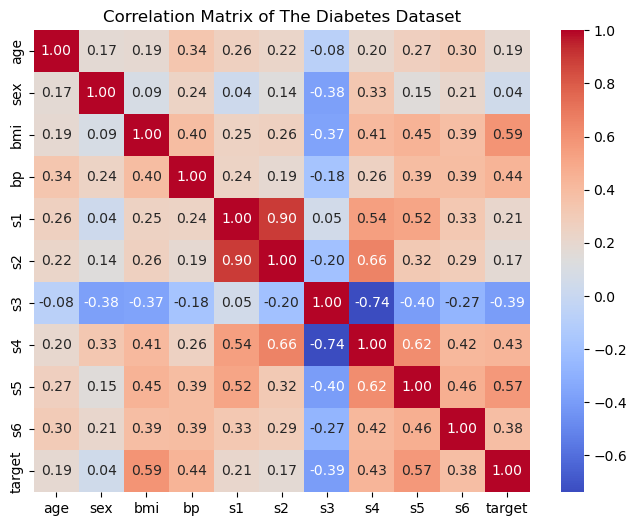

In [13]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of The Diabetes Dataset')
plt.show()

This plot shows how each feature correlates with other features and the target variable in the dataset. features like bmi, bp, s4,s5, and s6 show higher correlation figures with the target variable. Let us pick bmi and show a graph of how different value groupings of the feature relate to the target variable.

#### Boxplot by BMI groups

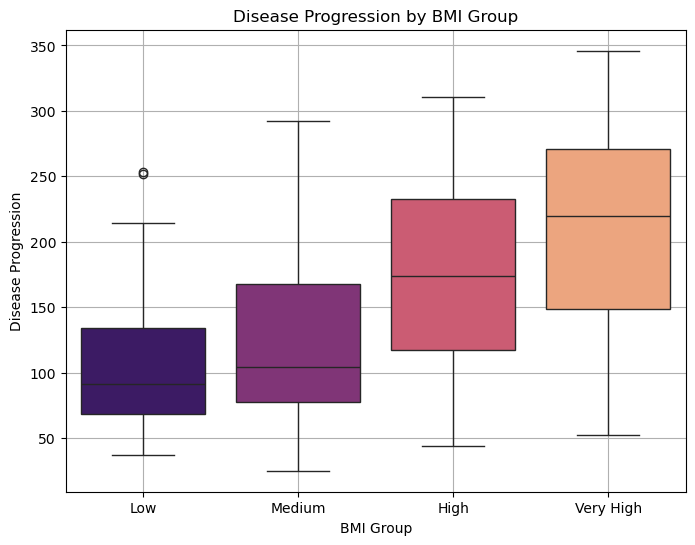

In [14]:
# Creating bmi bins
data_df['bmi_group'] =pd.qcut(data_df['bmi'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8,6))
sns.boxplot(x='bmi_group', y = 'target', data=data_df,hue = 'bmi_group',palette='magma', legend=False)
plt.title('Disease Progression by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Disease Progression')
plt.grid(True)
plt.show()

The above graph is a clear indicator of the association between having a high bmi and disease progression. This all ties with the regression analysis as well as the decision tree analysis. A high bmi is associated with a high diabetes progression. This is similar for blood pressure as is shown in the graph below

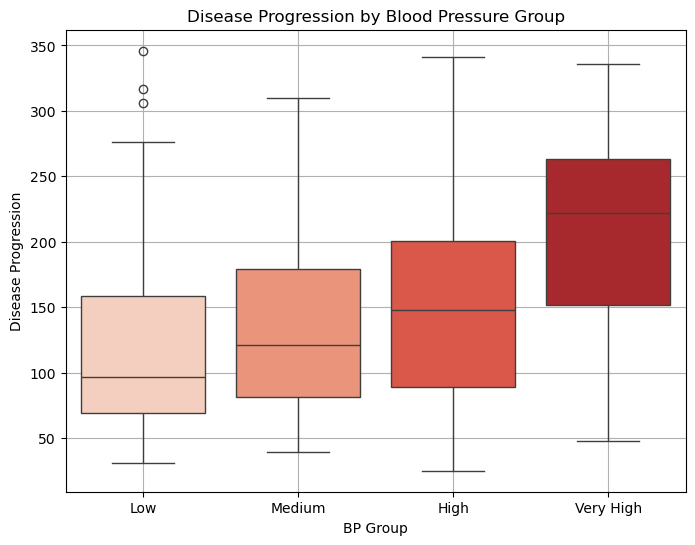

In [15]:
# Creating bmi bins
data_df['bp_group'] =pd.qcut(data_df['bp'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8,6))
sns.boxplot(x='bp_group', y = 'target', data=data_df, hue = 'bp_group',palette='Reds', legend=False)
plt.title('Disease Progression by Blood Pressure Group')
plt.xlabel('BP Group')
plt.ylabel('Disease Progression')
plt.grid(True)
plt.show()
# Other useful palettes include: viridis, rocket, coowarm, blues

In the next section, I will fit various types of models to see how they perform and also show their validation Mean squared errors. Mean squared error (MSE) is a measure of the average of the squares of errors. It is the average squared diffference between predicted and actual values. It is useful for model performance evaluation and model comparison.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
# The model we are fitting is y=B_0+B_1x a simple linear regression

x = data_df.drop(columns = ['target','bmi_group', 'bp_group'])
y = data_df['target']
# Split data into training and testing sets using an 80/20 split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state = 4)

# Fit Linear model
model3= LinearRegression()
model3.fit(x_train, y_train)

# Prediction
y_train_pred = model3.predict(x_train)
y_val_pred = model3.predict(x_val)

# Compute MSEs
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# MSE results
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {val_mse:.4f}")

Training MSE: 2862.9272
Testing MSE: 2939.3582


In [18]:
# Lets use the higher correlation features to fit the models and visualize the results
x = data_df[['bmi','bp','s4', 's5', 's6']]
y = data_df['target']

# Split data into training and testing sets using an 80/20 split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state = 4)

# model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)

# model 2: Polynomial regression (degree 2)
p_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
p_model.fit(x_train, y_train)
y_pred_p = p_model.predict(x_val)
mse_p = mean_squared_error(y_val, y_pred_p)

# model 3: Ridge Regression
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)

# print MSEs
print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Polynomial Regression MSE: {mse_p:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")

Linear Regression MSE: 2967.59
Polynomial Regression MSE: 3604.34
Ridge Regression MSE: 2980.52


Taking a squareroot of these MSEs shows us just how many points the model prediction deviates from the target variable. Earlier through descriptive analysis we found that the mean target variable was about 152. Therefore the linear regression model prediction deviates about 54 points from the target or about 36% off target. The Polynomial regression model prediction deviates about 60 points from the target or about 39% off target. The ridge regression deviates about 55 points or 36% off target. We can improve on these models by doing hyperparameter tuning or using other types of models. 

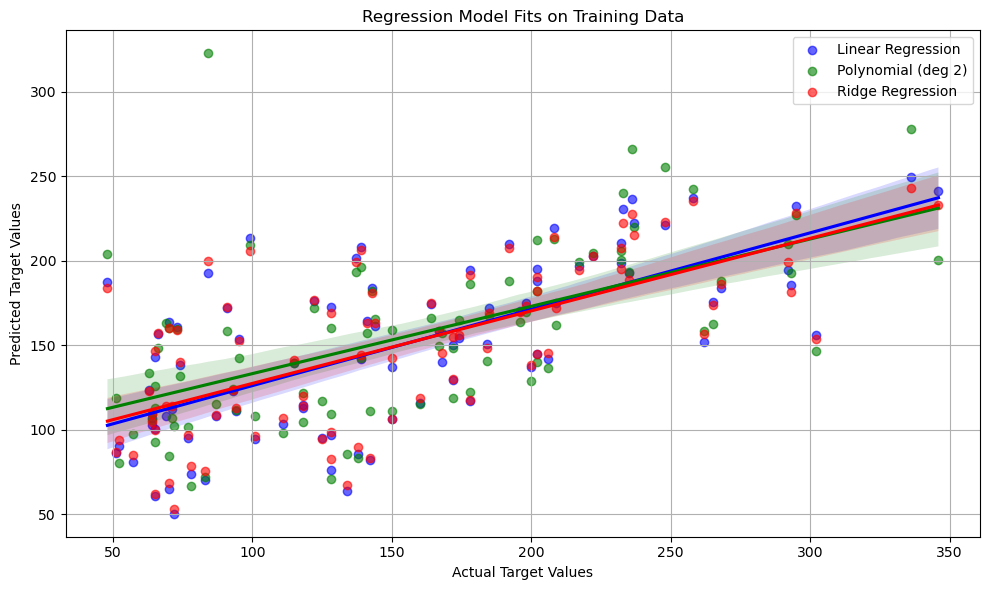

In [19]:
# lets visualize the fits
plt.figure(figsize=(10, 6))

# Scatter of Actual vs Predicted for each model
sns.regplot(x=y_val, y= y_pred_lr, scatter_kws={'alpha':0.6},label='Linear Regression', color='blue')
sns.regplot(x=y_val, y= y_pred_p, scatter_kws={'alpha':0.6},label='Polynomial (deg 2)', color='green')
sns.regplot(x=y_val, y= y_pred_ridge, scatter_kws={'alpha':0.6},label='Ridge Regression', color='red')

plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Regression Model Fits on Training Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The only disadvantage with this approach is that the validation error, which approximates the test error, is highly variable and dependent on how the data is split. Only a subset of the training set are used to fit the model (80% of 442 entries), meaning that the validation error maybe overestimating the test error. 
THE NEXT STEP IS TO USE CROSS VALIDATION which will repeat the training validation split multiple times in order to estiimate the test error associated with a given statistical leaning method in order to evaluate its performance with less variability (model assessment) and select the appropriate level of flexibility (select the best model or parameters)  
Mechanisim: Holding out a subset of the training observations from the fitting process and then applying the fitted model to those held out observations  
#### K-FOLD CV
The dataset is divided into K subsets (or folds) and the model is trained on K-1 folds and validated on the remaining folds. this process is repeated K times, with each fold serving as the validation set exactly once.
Other methods are:  
Leave-One-Out Cross-Validation (LOOCV): In LOOCV, only one data point is used for validation, and the model is trained on the remaining data. This process is repeated for each data point in the dataset. So, if there are 100 datapoints, we will repeat this procedure 100 times. this method is computationally expensive

In [20]:
Lets apply k-fold cv to see just how well the models perform

SyntaxError: invalid syntax (3724540301.py, line 1)

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import pandas as pd

# Load dataset
diabetes = load_diabetes()
data_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data_df['target'] = diabetes.target

X = data_df[['bmi','bp','s4', 's5', 's6']]
y = data_df['target']

# Set up KFold and MSE scorer
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 1. Linear Regression
lr = LinearRegression()
lr_mse = -cross_val_score(lr, X, y, cv=kf, scoring=mse_scorer)

# 2. Polynomial Regression (degree 2) with StandardScaler
poly_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_mse = -cross_val_score(poly_model, X, y, cv=kf, scoring=mse_scorer)

# 3. Ridge Regression (alpha=1.0) with StandardScaler
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_mse = -cross_val_score(ridge_model, X, y, cv=kf, scoring=mse_scorer)

# Print results
print("Linear Regression MSEs:", lr_mse)
print("  Average MSE:", lr_mse.mean(), "\n")

print("Polynomial Regression MSEs:", poly_mse)
print("  Average MSE:", poly_mse.mean(), "\n")

print("Ridge Regression MSEs:", ridge_mse)
print("  Average MSE:", ridge_mse.mean(), "\n")


All the models show slightly higher MSEs compared to a regular validation method after applying k-fold cross validation, except for the polynomial regression. Recall that the LinearRegression uses raw features. PolynomialRegression includes squared terms and RidgeRegression regularizes to prevent overfitting. We used 5 folds in the above code. Each fold trains the model on 80% of the data and tests it on 20%. The next ideal steps would be to do some hyperparameter tuning, feature engineering, and or use alternative models like random forest. We will leave this here for this project.

#### Using OLS for inference

In the next step, we will fit a simplementation OLS to get an easy to interpret outcome on how each predictor/feature relates to the outcome variable, target. 

In [ ]:
# Fitting a Linear regression model with Statsmodels
import statsmodels.api as sm
# add intercept/constant
X = data_df.drop(columns = 'target')
X = sm.add_constant(X)
y = data_df['target']

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Summary of regression results
print(ols_model.summary())

#### Model Performance Indicators
Here is a rundown of the output and what each of the items in the table mean:  
R-squared (0.518) → About 51.8% of the variation in diabetes progression is explained by the independent variables.  
Adj. R-squared (0.507) → Adjusts for the number of predictors, still indicating a moderate model fit.  
F-statistic (46.27, p < 0.000) → Model as a whole is statistically significant (some predictors significantly affect diabetes progression).  
AIC (4794) & BIC (4839) → Lower values indicate a better model fit, useful for comparing multiple models.

#### Coefficients & Their Meaning
Each coefficient represents the estimated effect of the predictor on the diabetes progression while keeping other variables constant: We will see that some coefficients have a p-value greater than 0.05 and are therefore not statistically significant. Some of those features like Age are obviously important and might have a strong association with diabetes but this data does not seem to capture that. The fact that the dataset was standardized before being uploaded is a strong suspect for this occurrence.

#### Predictor coefficient interpretation
const (152.13)	The baseline level of the target variable when all predictors are zero.  
age (-10.00, p=0.867)	Not statistically significant → Age alone does not strongly impact diabetes progression.  
sex (-239.81, p=0.000)	Statistically significant → Being male (assuming encoded as 1) appears to negatively correlate with diabetes progression.  
bmi (519.85, p=0.000)	Highly significant positive effect → Higher BMI strongly correlates with worse diabetes progression.  
bp (324.38, p=0.000)	Statistically significant → High blood pressure is strongly associated with worsening diabetes progression.  
s1 (-792.17, p=0.058)	Almost significant (p=0.058), suggests a potential negative effect, but not conclusive.
s2 (476.73, p=0.160)	Not statistically significant.  
s3 (101.04, p=0.635)	Not statistically significant.  
s4 (177.06, p=0.273)	Not statistically significant.  
s5 (751.27, p=0.000)	Highly significant → Indicates strong positive correlation with diabetes progression.
s6 (67.62, p=0.306)	Not statistically significant.  
#### Statistical Tests & Assumptions
Durbin-Watson (2.029) → Suggests no significant autocorrelation in residuals (good for regression assumptions).

Jarque-Bera Test (p = 0.496, Skew = 0.017) → Residuals appear normally distributed (no extreme outliers).  

Kurtosis (2.726) → Slightly more peaked than a normal distribution (not extreme).  

Condition Number (227) → Moderate multicollinearity risk (not too high).  

#### Take-home Message About Diabetes Progression
BMI, blood pressure, and marker s5 have the strongest positive influence on diabetes progression.  
Sex has a statistically significant negative correlation, possibly suggesting differences in disease progression between genders.   
Age does not seem to have a strong impact, which might be counterintuitive but could indicate other factors are more important.  
Some predictors (s1, s2, s3, s4, s6) do not show strong statistical significance, meaning they might have minimal influence.  

#### Decision Tree
Goal: Use tree splits to see threshold effects (e.g., “if BMI > 30, then...”).
How: Train a shallow decision tree with max_depth=3.
Interpretation: Very interpretable if pruned (not overfitted), and you can visualize the tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Split data into training and testing sets using an 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

# train a simple tree (shallow for interpretability) with a depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=4)
tree_reg.fit(x_train, y_train)

#Evaluate model performance
y_train_pred_dt = tree_reg.predict(x_train)
y_test_pred_dt = tree_reg.predict(x_test)

dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)

print(f"Training MSE: {dt_train_mse:.2f}")
print(f"Test MSE: {dt_test_mse:.2f}")

#### Visualize the Decision Tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plot_tree(tree_reg, feature_names = x.columns, filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

#### Interpretation Tips
Each node asks a yes/no question about a feature (e.g., bmi <= 0.009). The leaf nodes give the predicted disease progression (target value). We can trace a patient’s path through the tree to see how the prediction was made.  
#### Here is a partial interpretation focusing on the left part of the tree:  
Left Subtree (Lower BMI patients):  
1. bmi <= -0.029 → Splits 222 samples  
Predicted value: 120.11  
a. bmi <= -0.058 (108 samples, mean = 101.18)  
Lowest diabetes scores, splits again:  
bmi <= -0.058: 35 samples, value = 88.54  
Else: 73 samples, value = 107.23  
b. bmi > -0.058 and <= 0: 114 samples, mean = 138.04  
Splits again:  
89 samples, value = 133.66  
25 samples, value = 153.64  
This entire branch shows that as BMI increases slightly, the diabetes progression values rise as well

#### Summary of Interpretation:
Our conclusion, based on this simple analysis is that BMI is a strong predictor of diabetes progression in this dataset. There's a clear upward trend: as BMI increases, the predicted target (diabetes progression) also increases.

#### Final thoughts
Machine Learning Techniques Used
1. Supervised Learning (Regression)
We used labeled data: a set of predictors (age, bmi, bp, etc.) and a known target (disease progression).
We trained models to predict the target based on these features.
2. Model Fitting

We fitted several models:
Linear Regression
Polynomial Regression (a form of feature engineering + linear model)
Ridge Regression (regularized linear model)
DecisionTreeRegressor
3. Model Evaluation

We used Mean Squared Error (MSE) to evaluate model performance.
We implemented train/test splits and k-fold cross-validation, which are standard practices in ML for performance assessment and generalization.
4. Feature Engineering (in Polynomial Regression)

We expanded features by adding powers of x (e.g., x^2, which is a core ML preprocessing technique.
#### To What Extent?
We applied foundational machine learning techniques that are:

Model-driven (we specified model forms: linear, quadratic),  
Predictive (focused on predicting progression scores),  
Evaluated using cross-validation.  

What we did not do yet, which would push it further into ML territory:  
Automated feature selection  
Hyperparameter tuning (e.g., optimizing the Ridge penalty parameter α  
Ensemble methods or more complex nonlinear models (like decision trees, random forests, or neural networks)

#### Summary
This activity involves basic but essential machine learning techniques used in regression analysis. While the project did not touch on other topics such as hyperparameter tuning, feature selection, and other model choices like RandomForestRegression and XGBoost, the activity featured some relevant basic ML techniques.